<a href="https://colab.research.google.com/github/nataliaCardosoo/API/blob/main/telecomx_br.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [ ]:
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/main/TelecomX_Data.json'

In [ ]:
df = pd.read_json(url)

In [ ]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [ ]:
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


#🔧 Transformação

In [ ]:
df['customer'].head()

,customer
0,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part..."
1,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne..."
2,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne..."
3,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne..."
4,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part..."


In [ ]:
customer_df = pd.json_normalize(df['customer'])
df = pd.concat([df, customer_df], axis=1)

In [ ]:
phone_df = pd.json_normalize(df['phone'])
df = pd.concat([df, phone_df], axis=1)

In [ ]:
internet_df = pd.json_normalize(df['internet'])
df = pd.concat([df, internet_df], axis=1)

In [ ]:
account_df = pd.json_normalize(df['account'])
df = pd.concat([df, account_df], axis=1)

In [ ]:
df.drop(columns=['customer', 'phone', 'internet', 'account'], inplace=True)

In [ ]:
df['Charges.Monthly'] = pd.to_numeric(df['Charges.Monthly'], errors='coerce')
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')

#📊 Carga e análise

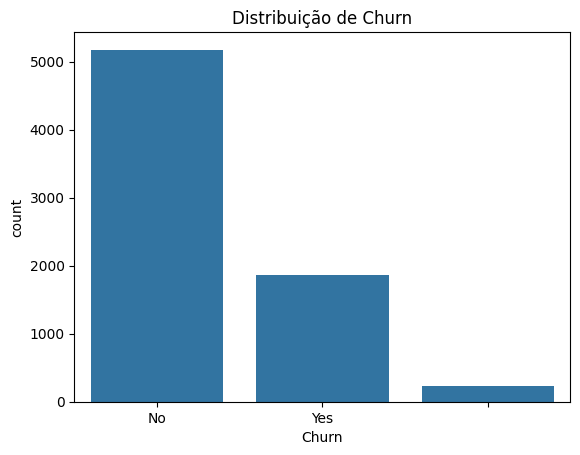

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title('Distribuição de Churn')
plt.show()

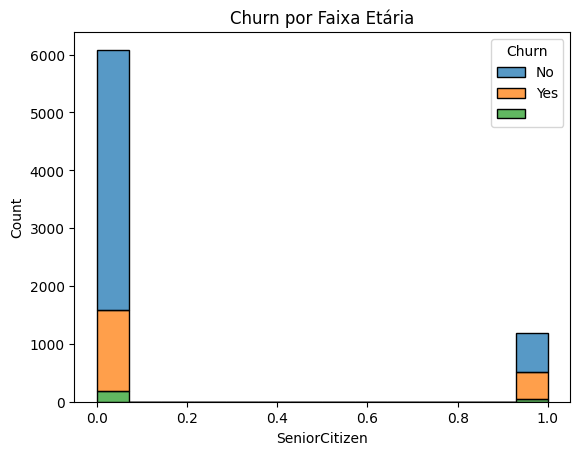

In [ ]:
sns.histplot(data=df, x='SeniorCitizen', hue='Churn', multiple='stack')
plt.title('Churn por Faixa Etária')
plt.show()

#📄Relatorio Final

## 🎯 Introdução
Este relatório tem como objetivo analisar a evasão de clientes (churn) da empresa **Telecom X**, identificando padrões de comportamento e características dos clientes que mais cancelam os serviços.

## 🧪 Metodologia
Os dados foram extraídos de um arquivo JSON hospedado no GitHub. Em seguida, foram transformados para:
- Corrigir tipos de dados.
- Expandir colunas agrupadas (`customer`, `phone`, `internet`, `account`).
- Preparar os dados para análise exploratória.

## 📊 Análise Exploratória

### 🔹 Distribuição de Churn
A distribuição de churn mostra a proporção de clientes que deixaram a empresa.

### 🔹 Churn por Tipo de Contrato
Clientes com contratos **mensais** apresentam maior probabilidade de churn, indicando que contratos de curto prazo estão mais associados à evasão.

### 🔹 Churn por Faixa Etária
Clientes com idade igual ou superior a 65 anos (identificados pela coluna `SeniorCitizen`) têm maior propensão ao churn, sugerindo a necessidade de atenção especial a esse grupo.

## ✅ Conclusão
Os principais achados indicam que:
- Clientes com **contratos mensais** são mais propensos a cancelar os serviços.
- Clientes **idosos** também apresentam maior taxa de churn.

## 💡 Sugestões
- Oferecer **descontos ou benefícios** para contratos de longo prazo.
- Criar um **programa de suporte dedicado** para clientes idosos.
- Monitorar regularmente os indicadores de churn para ações preventivas.

---

*Relatório gerado como parte do desafio de análise de dados da Telecom X.*
